<a href="https://colab.research.google.com/github/VIRU2341/alma-better-playstore/blob/main/Mobile_price_range_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** : Mobile price range Prediction.


**Project Type** - Classification

**Contribution** - Individual

**Project By** - Virendra Singh Rawat

##**Project Summary**
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **GitHub Link -**

https://github.com/VIRU2341/alma-better-playstore.git

# ***Let's Begin !***

In [1]:
#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the csv dataset
dataset = pd.read_csv('/content/drive/MyDrive/mobile price/data_mobile_price_range.csv')


In [4]:
#first look of our dataset
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#basic info about our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

***Correaltion between Features***

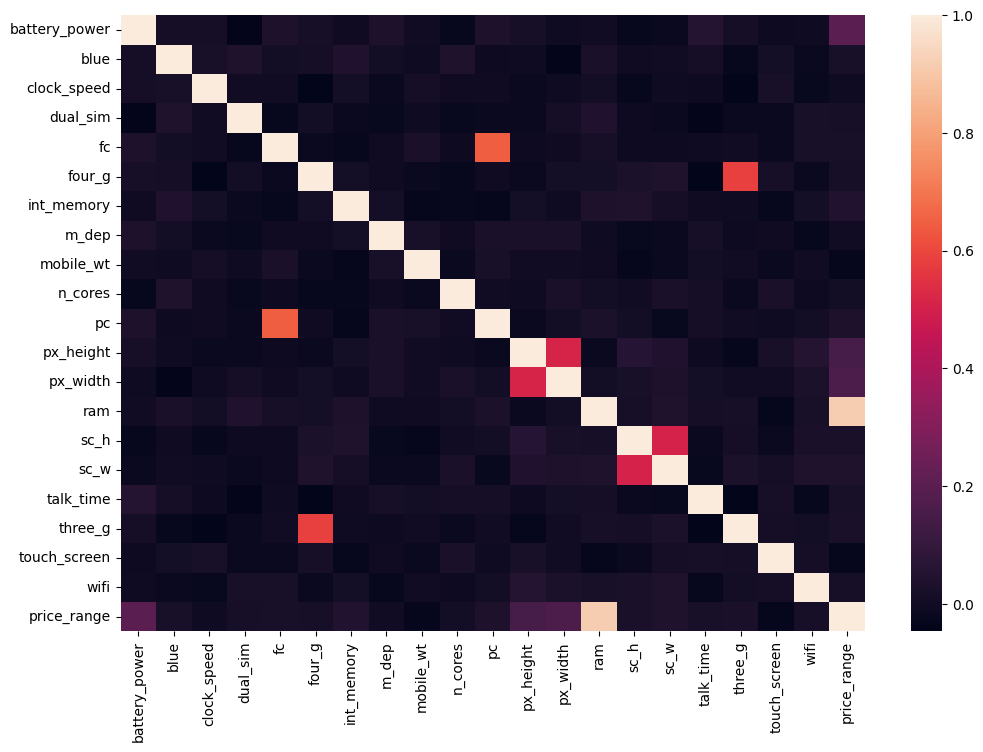

In [8]:
corr = dataset.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr)
plt.show()

In [9]:
corr.sort_values(by=['price_range'], ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

First of all, our target feature is price_range. This feature has highly correleated with features such as

1.ram

2.battery_power

3.px_height

4.px_width

Since, price_range feature has high correaltion with ram. so we want to see the ram distribution and relation with price range.

Text(0.5, 1.0, 'Distribution of Ram')

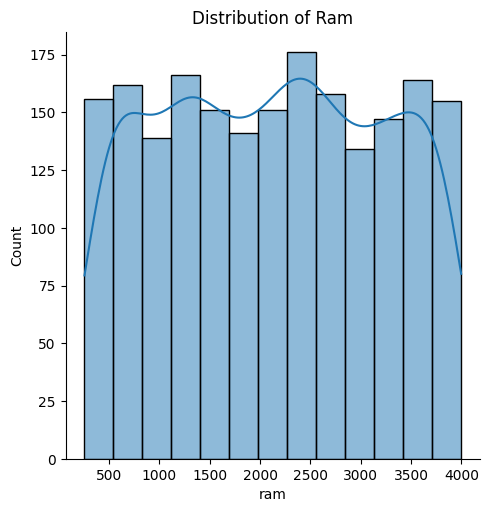

In [ ]:
sns.displot(dataset['ram'], kde=True)
plt.title('Distribution of Ram')

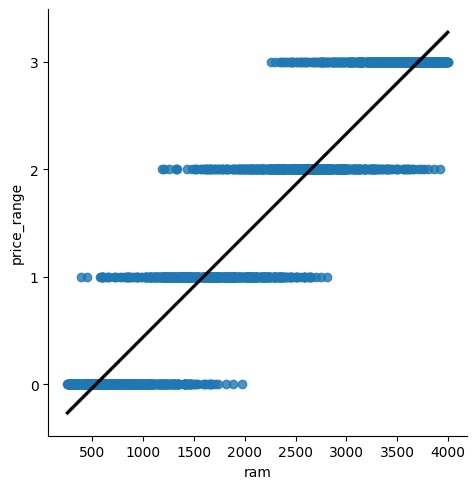

In [ ]:
sns.lmplot(x='ram', y='price_range', data=dataset, line_kws={'color':'black'})
plt.yticks([0, 1, 2, 3])
plt.show()

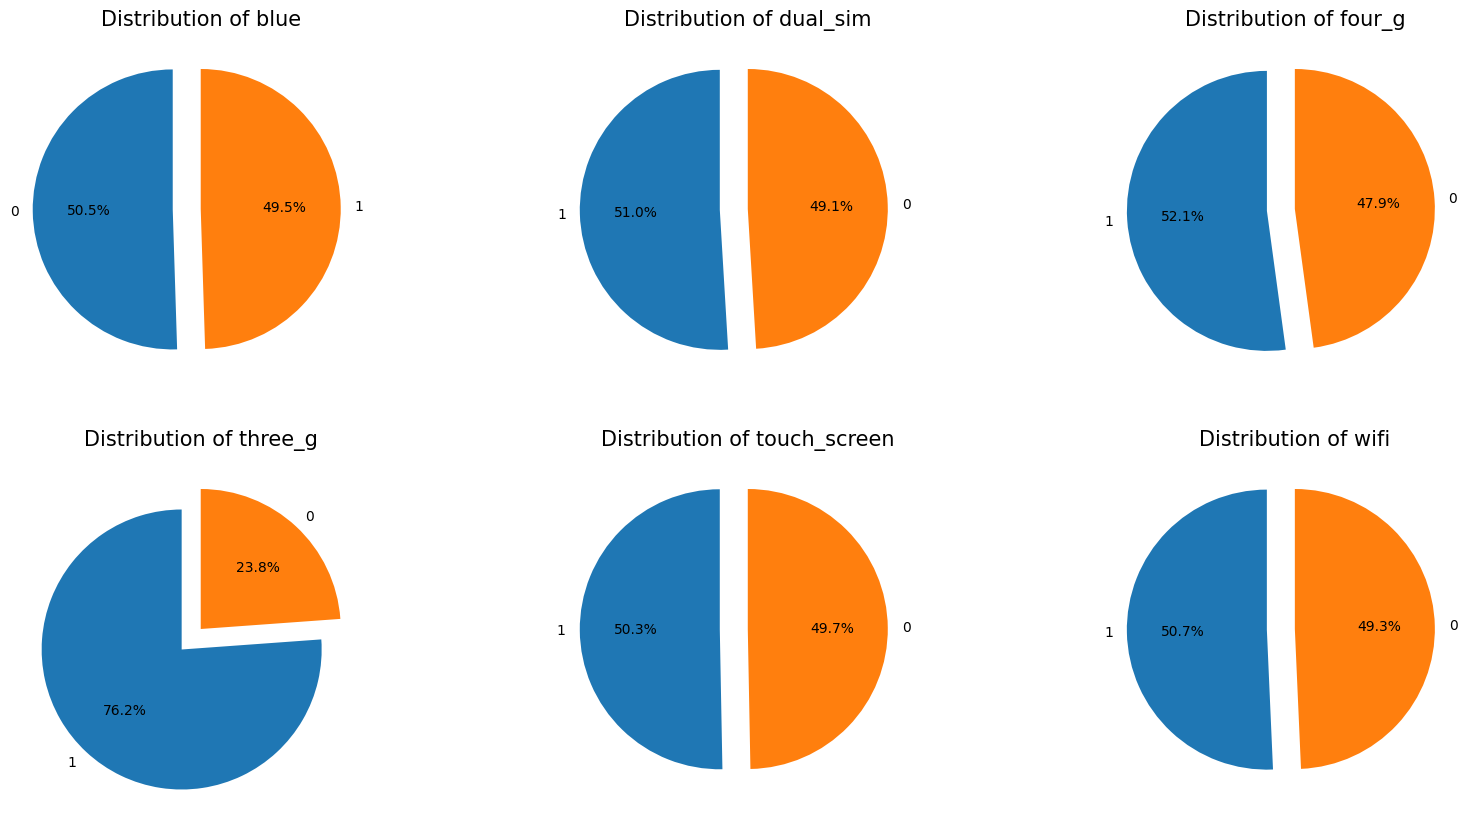

In [ ]:
categorical_feature = [feature for feature in dataset.columns if len(dataset[feature].unique()) < 3]

plt.figure(figsize=(20, 10))
count = 0
for feature in categorical_feature:
    data = dataset.copy()
    explode = [0.2, 0]

    labels = dataset[feature].value_counts().index
    sizes = dataset[feature].value_counts().values

    plt.subplot(2, 3, count+1)
    plt.pie(sizes, labels=labels, explode=explode, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {categorical_feature[count]}', color='black', fontsize=15)
    count += 1

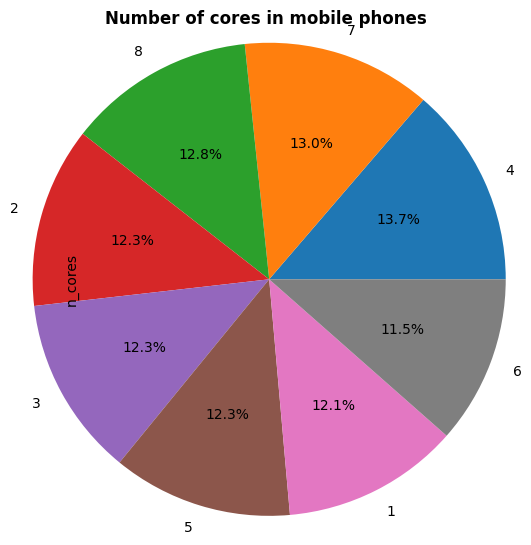

In [ ]:
n_cores = dataset['n_cores'].value_counts()
plt.title('Number of cores in mobile phones \n\n\n', weight='bold')
n_cores.plot.pie(autopct='%.1f%%', radius = 1.6)
plt.show()

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

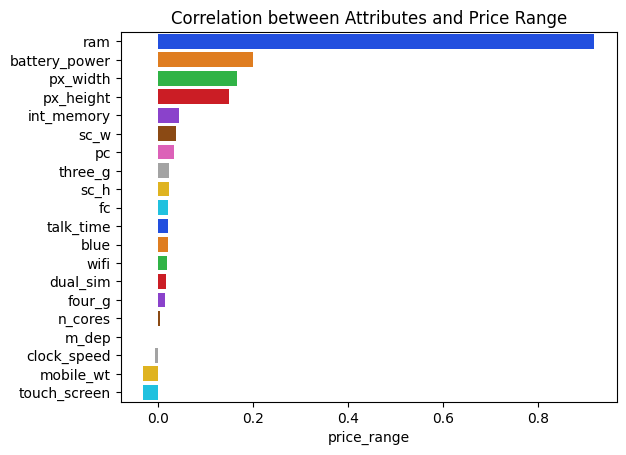

In [ ]:
#we are not considering the correlations between X features among themselves
corr = dataset.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

**Touch screen RAM and Price range**

<Axes: xlabel='touch_screen', ylabel='ram'>

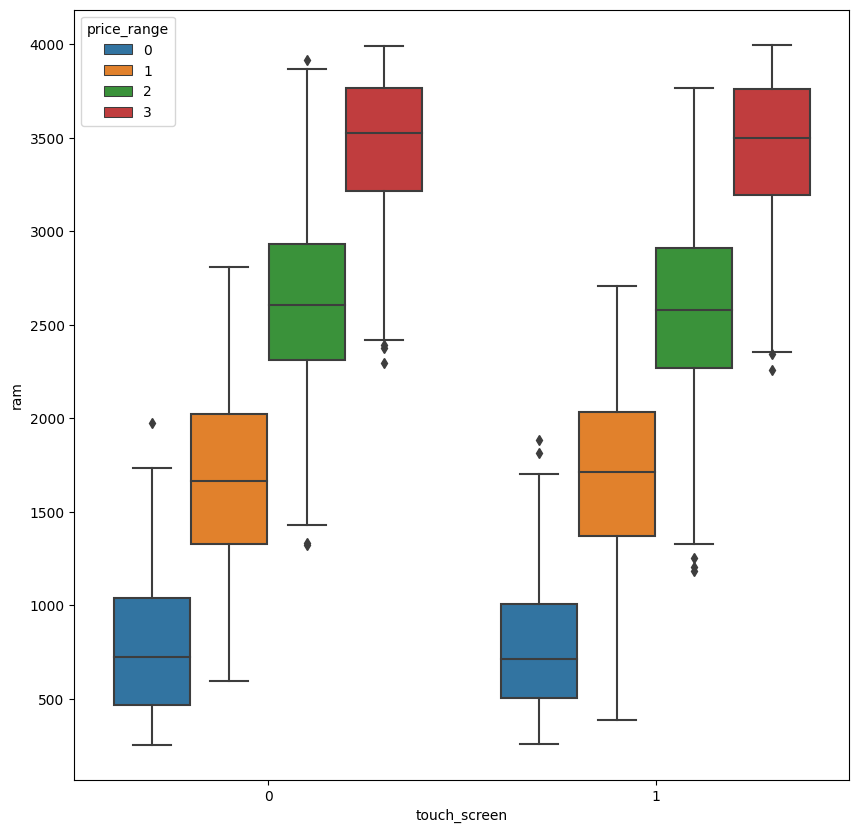

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='touch_screen', y='ram', hue='price_range', data=dataset)

**3g RAM and price range**

<Axes: xlabel='three_g', ylabel='ram'>

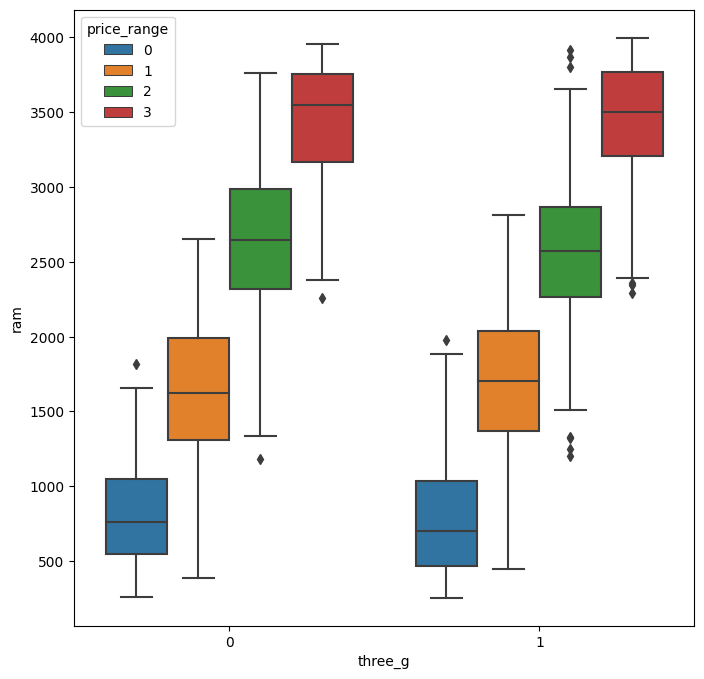

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='three_g', y='ram', hue='price_range', data=dataset)

**4g RAM and price range**

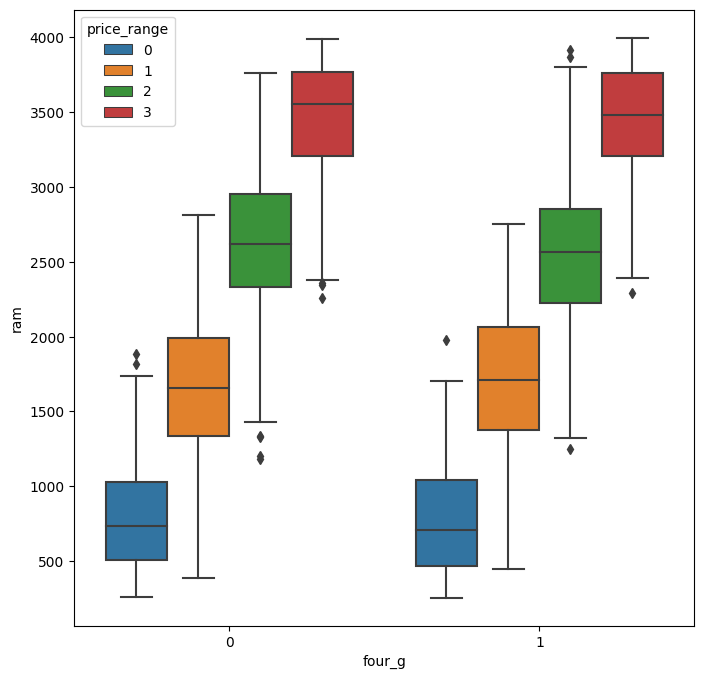

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='four_g', y='ram', hue='price_range', data=dataset)
plt.show()

**Front Camera mega pixels(fc) - RAM and Price Range**

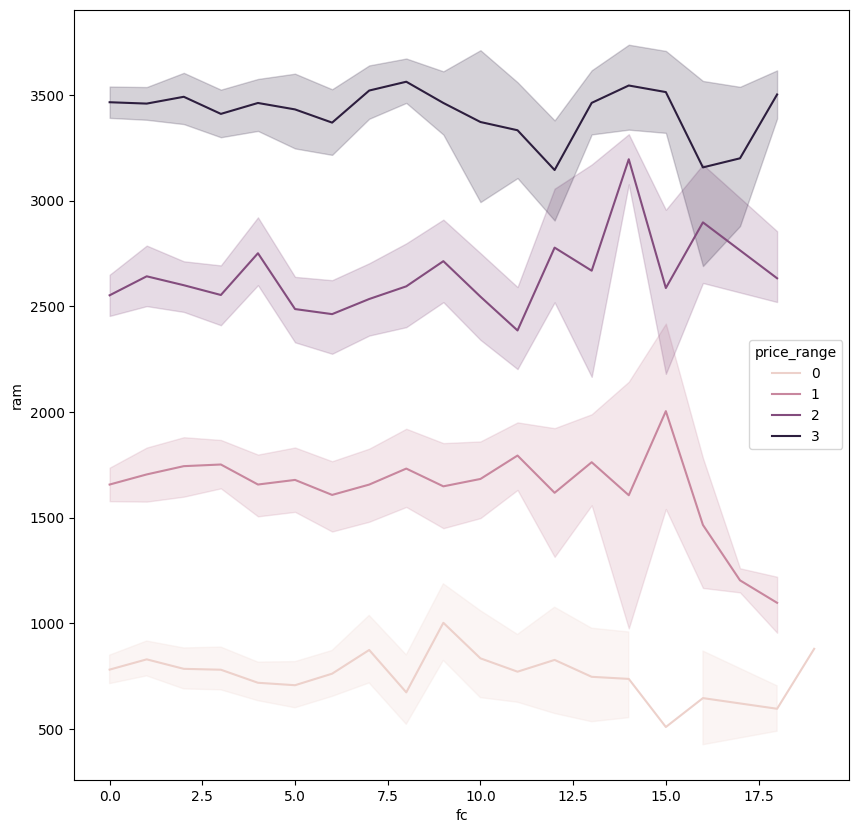

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x='fc', y='ram', hue='price_range', data=dataset)
plt.show()

-->Analysis of Attributes<--



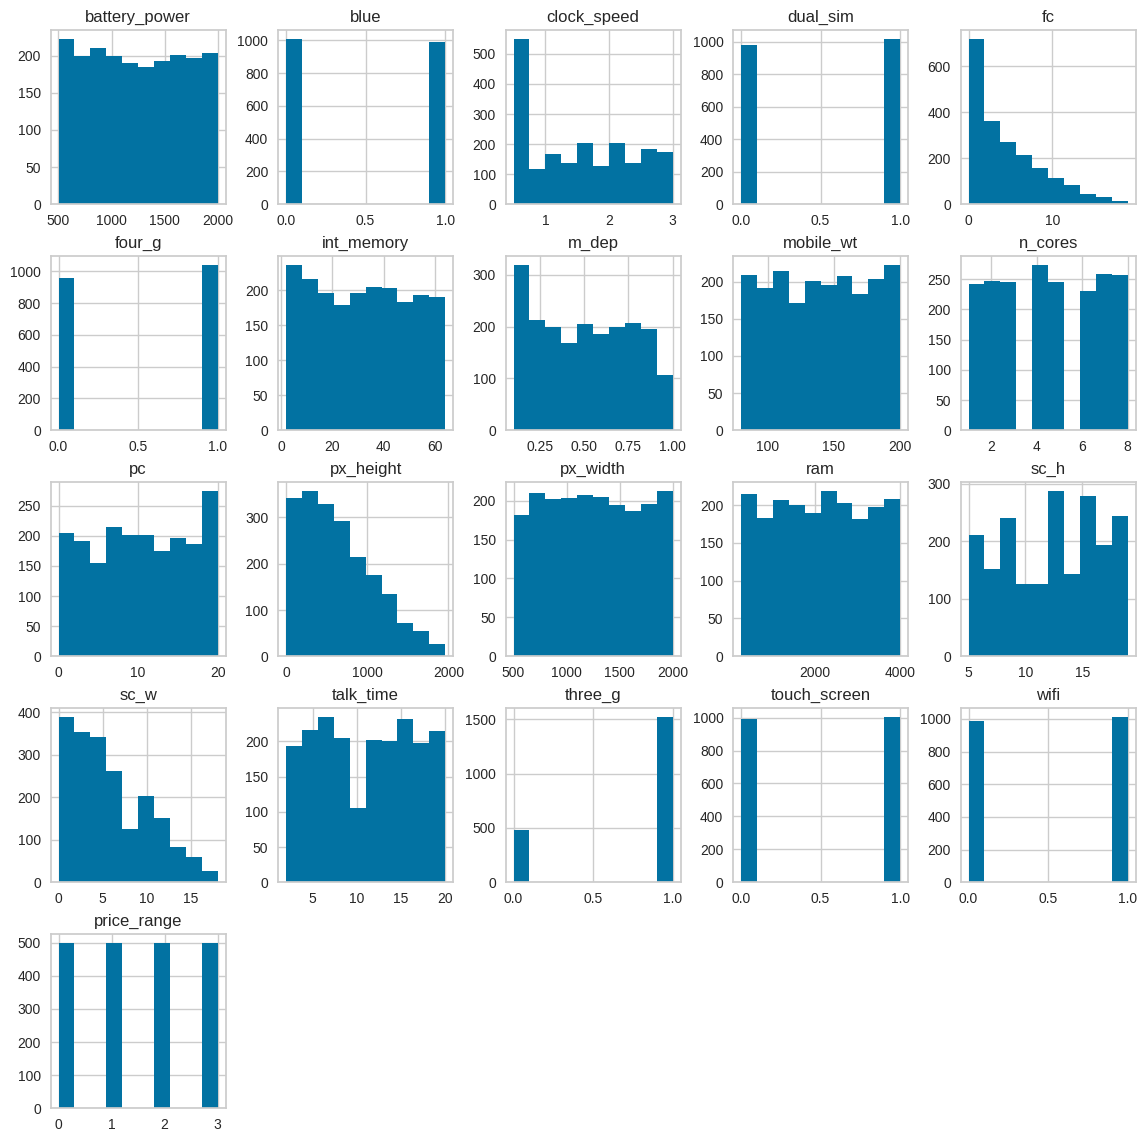

In [30]:
#data visualization drawing histogram
print("-->Analysis of Attributes<--")
print()
dataset.hist(sharex=False, sharey=False, figsize=(14,14) )
plt.show()

**Train-test-split**

In [10]:
x = dataset.drop(['price_range'], axis=1)
y = dataset['price_range'].values
X = (x- np.min(x)) / (np.max(x) - np.min(x))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1600
400
1600
400


**Class balance Visualization**

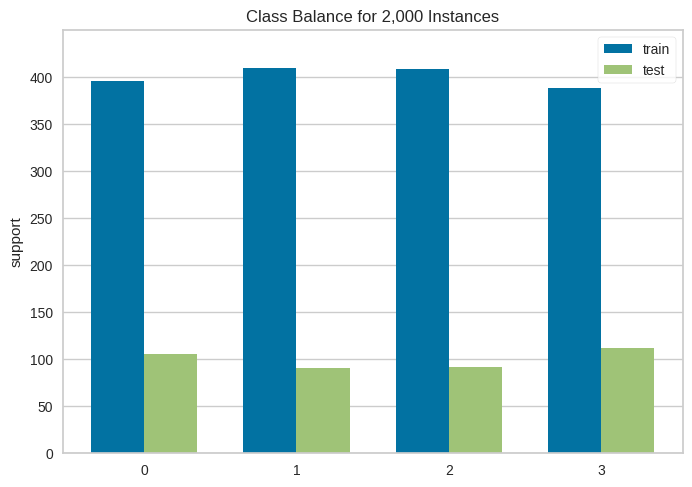

<Axes: title={'center': 'Class Balance for 2,000 Instances'}, ylabel='support'>

In [12]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(lables=[0, 1, 2, 3])
visualizer.fit(y_train, y_test)
visualizer.show()

 from above members of all classes are about the same.

***Model creation***

In [13]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train, y_train)
print('Train accuracy:', svm.score(x_train, y_train))
print('Test accuracy:', svm.score(x_test, y_test))

Train accuracy: 0.969375
Test accuracy: 0.8625


**Feature selection**

In [14]:
from sklearn.feature_selection import mutual_info_classif

In [15]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.0329081 , 0.0170471 , 0.        , 0.00854962, 0.        ,
       0.        , 0.00264205, 0.01477139, 0.01612466, 0.        ,
       0.        , 0.03316388, 0.03800409, 0.84542959, 0.        ,
       0.        , 0.00179444, 0.        , 0.02170242, 0.        ])

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

ram              0.845430
px_width         0.038004
px_height        0.033164
battery_power    0.032908
touch_screen     0.021702
blue             0.017047
mobile_wt        0.016125
m_dep            0.014771
dual_sim         0.008550
int_memory       0.002642
talk_time        0.001794
sc_h             0.000000
three_g          0.000000
sc_w             0.000000
pc               0.000000
n_cores          0.000000
four_g           0.000000
fc               0.000000
clock_speed      0.000000
wifi             0.000000
dtype: float64

<Axes: >

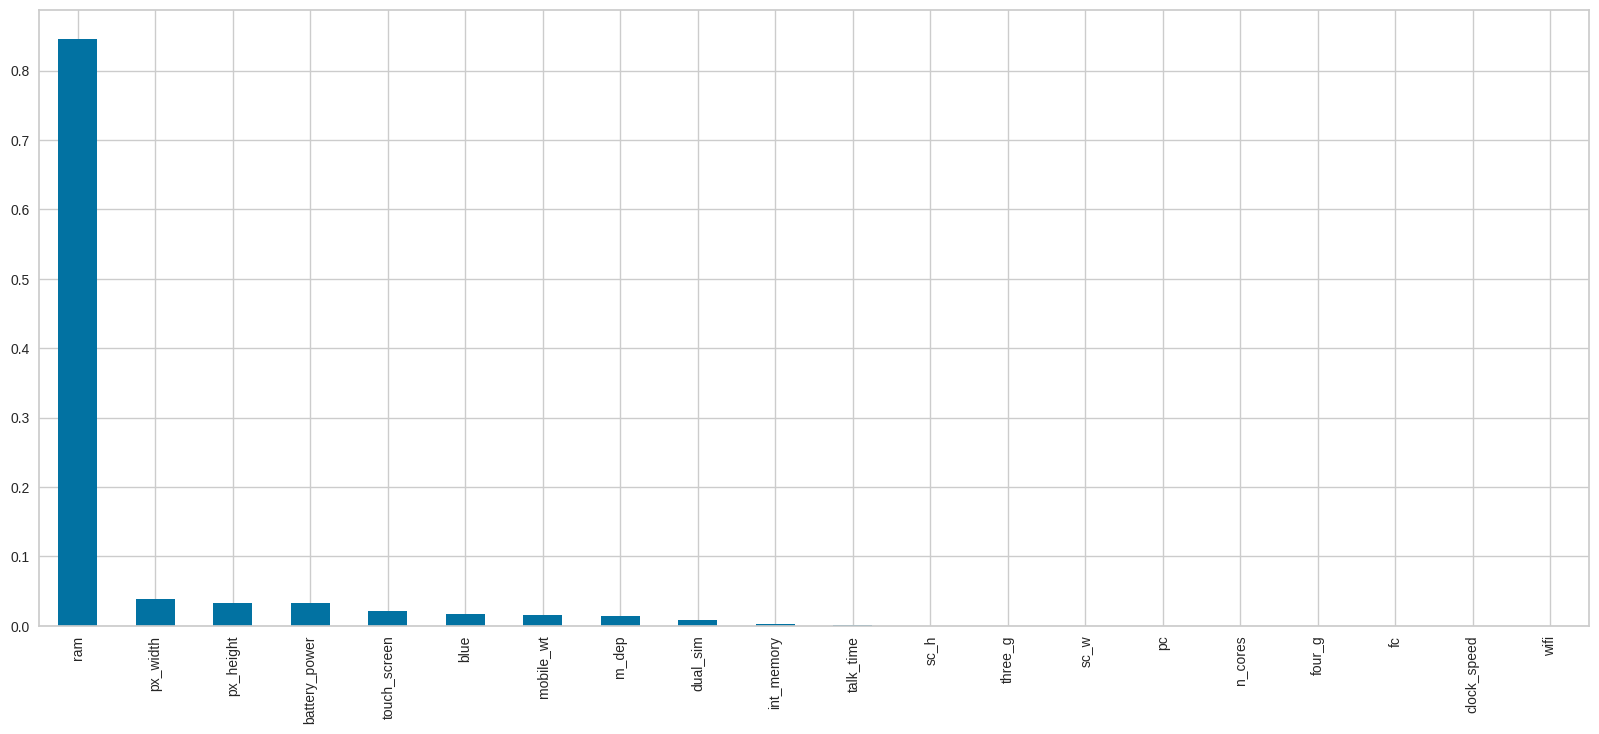

In [17]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [18]:
from sklearn.feature_selection import SelectKBest

In [19]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
x_new = sel_five_cols.fit_transform(x_train, y_train)
x_new_test = sel_five_cols.transform(x_test)

names_train = x_train.columns.values[sel_five_cols.get_support()]
names_test = x_test.columns.values[sel_five_cols.get_support()]

print('x_train feature: ', names_train)
print('x_test feature: ', names_test)

x_train feature:  ['battery_power' 'px_height' 'px_width' 'ram' 'touch_screen']
x_test feature:  ['battery_power' 'px_height' 'px_width' 'ram' 'touch_screen']


**Model with GridSearchCV**

In [20]:
from sklearn.model_selection import GridSearchCV
C = [1, 0.1, 0.25, 0.5, 2, 0.75]
kernel = ['linear', 'rbr']
gamma = ['auto', 0.01, 0.001, 0.0001, 1]
decision_function_shape = ['ovo', 'ovr']

In [21]:
svm = SVC(random_state=42)

grid_svm = GridSearchCV(svm, param_grid = dict(kernel=kernel, C=C, gamma=gamma, decision_function_shape=decision_function_shape), cv=5)
grid_svm.fit(x_new, y_train)
print('Best Score: ', grid_svm.best_score_)
print('Best Param: ', grid_svm.best_params_)

Best Score:  0.95625
Best Param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


StratifiedKFold is used when is need to balance of percentage each class in train & test.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [22]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

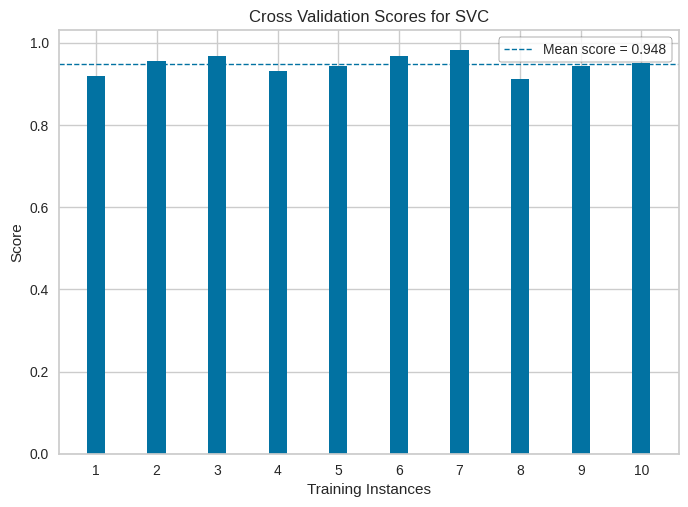

<Axes: title={'center': 'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
_, ax = plt.subplots()

cv = StratifiedKFold(10)

cvscore = CVScores(
        SVC(C = 1, decision_function_shape = 'ovo', gamma =  'auto', kernel = 'linear', random_state=42),
        ax = ax,
        cv = cv,
        scoring='accuracy'
)
cvscore.fit(x_new, y_train)
cvscore.show()

**Building Model**

In [24]:
final_svm_model = SVC(C=1,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
final_svm_model.fit(x_new, y_train)

SVC(C=1, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [25]:
print('Train accuracy: ', final_svm_model.score(x_new, y_train) )
print('Test accuracy: ', final_svm_model.score(x_new_test, y_test))

Train accuracy:  0.953125
Test accuracy:  0.97


**Prediction Visualization**

In [26]:
y_pred = final_svm_model.predict(x_new_test)

In [27]:
svm_test = x_test[['battery_power', 'px_height', 'px_width', 'ram', 'sc_w']]

In [28]:
svm_test['y_true'] = y_test
svm_test['y_pred'] = y_pred

In [29]:
svm_test.head()

,battery_power,px_height,px_width,ram,sc_w,y_true,y_pred
1860,0.764863,0.107653,0.739653,0.114912,0.333333,0,0
353,0.454910,0.140306,0.324433,0.616515,0.944444,2,2
1333,0.982632,0.149490,0.301736,0.283271,0.055556,1,1
905,0.325985,0.130612,0.596796,0.971673,0.388889,3,3
1289,0.076152,0.520918,0.973298,0.440941,0.277778,1,1
